# Credit Card Customer Segmentation

In this project, I will be using data about a credit card company's customers to segment the the customers into different groups and develop insights and draw conclusions about these groups and their tendencies/use of their credit cards.

Creating these different groups allows the company to apply different business strategies for each of the groups depending on the tendencies they have

I will be using an **unsupervised machine learning** model and using **K means clustering** to segment the customers

## Initial Data Analysis
I will be initializing my dataframe from the CSV data that I will use to process and analyze the data. But, before diving deeper, I'll be taking a cursory look through the data

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [75]:
df = pd.read_csv('customer_segmentation.csv')

In [76]:
df

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,51000,40,3,2,4003.0,15476,117,0.462
10123,710638233,41,M,2,Graduate,Divorced,40000,25,4,2,4277.0,8764,69,0.511
10124,716506083,44,F,1,High School,Married,33000,36,5,3,5409.0,10291,60,0.000
10125,717406983,30,M,2,Graduate,Unknown,47000,36,4,3,5281.0,8395,62,0.000


In [77]:
df.describe()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


In [78]:
# check for missing data
pd.isna(df).sum()

customer_id                 0
age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

In [79]:
from pandas.api.types import is_numeric_dtype
numCols = [col for col in df.drop("customer_id", axis=1).columns if is_numeric_dtype(df[col])]

/var/folders/nt/q1v_ny354h3gwt55h7nd7vnc0000gn/T/ipykernel_54472/677298556.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.drop('customer_id', axis=1).hist(ax=ax)


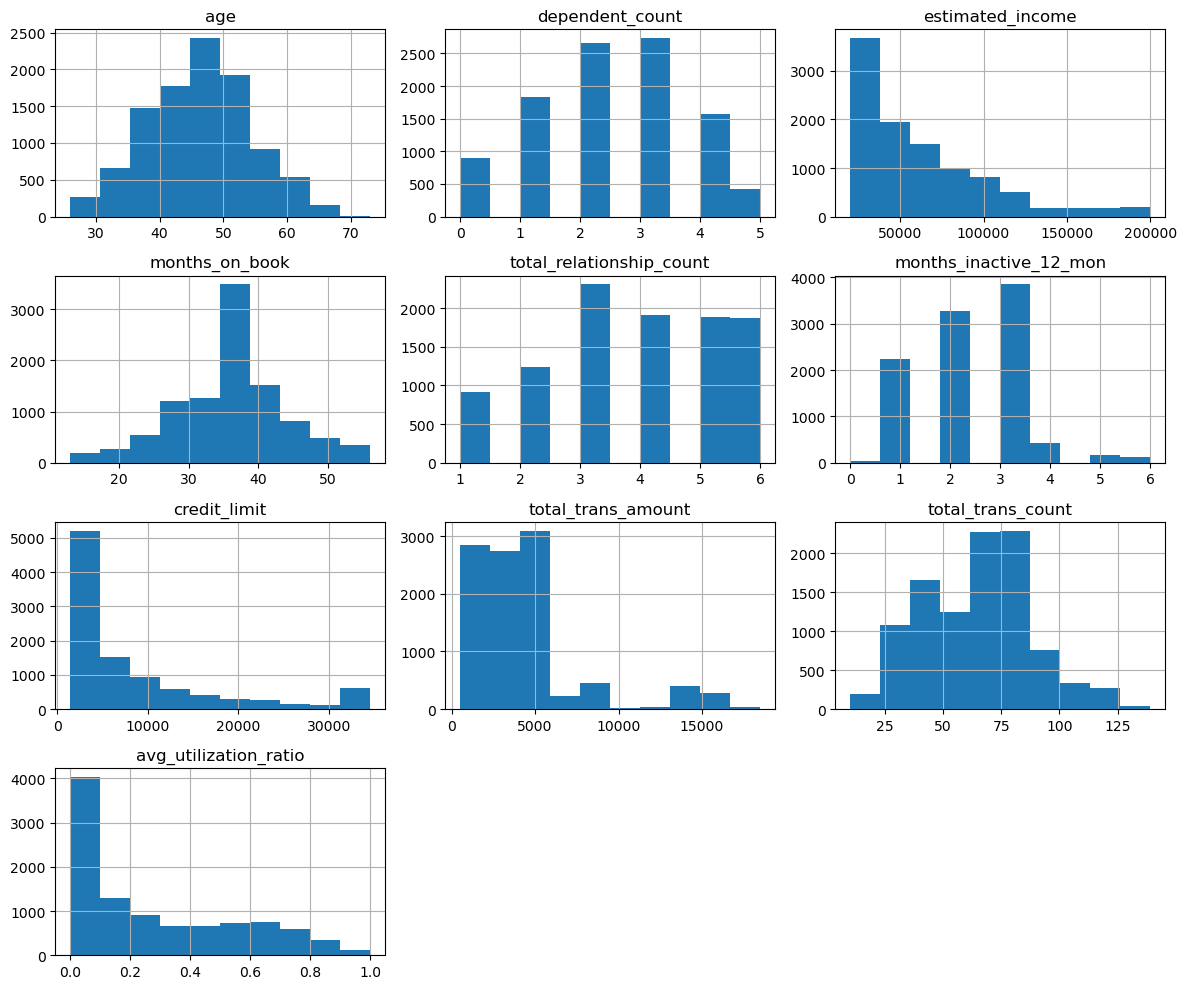

In [80]:
fig, ax = plt.subplots(figsize=(12, 10))

df.drop('customer_id', axis=1).hist(ax=ax)

plt.tight_layout()
plt.show()

In [81]:
catCols = [col for col in df.columns if not is_numeric_dtype(df[col])]
catCols

['gender', 'education_level', 'marital_status']

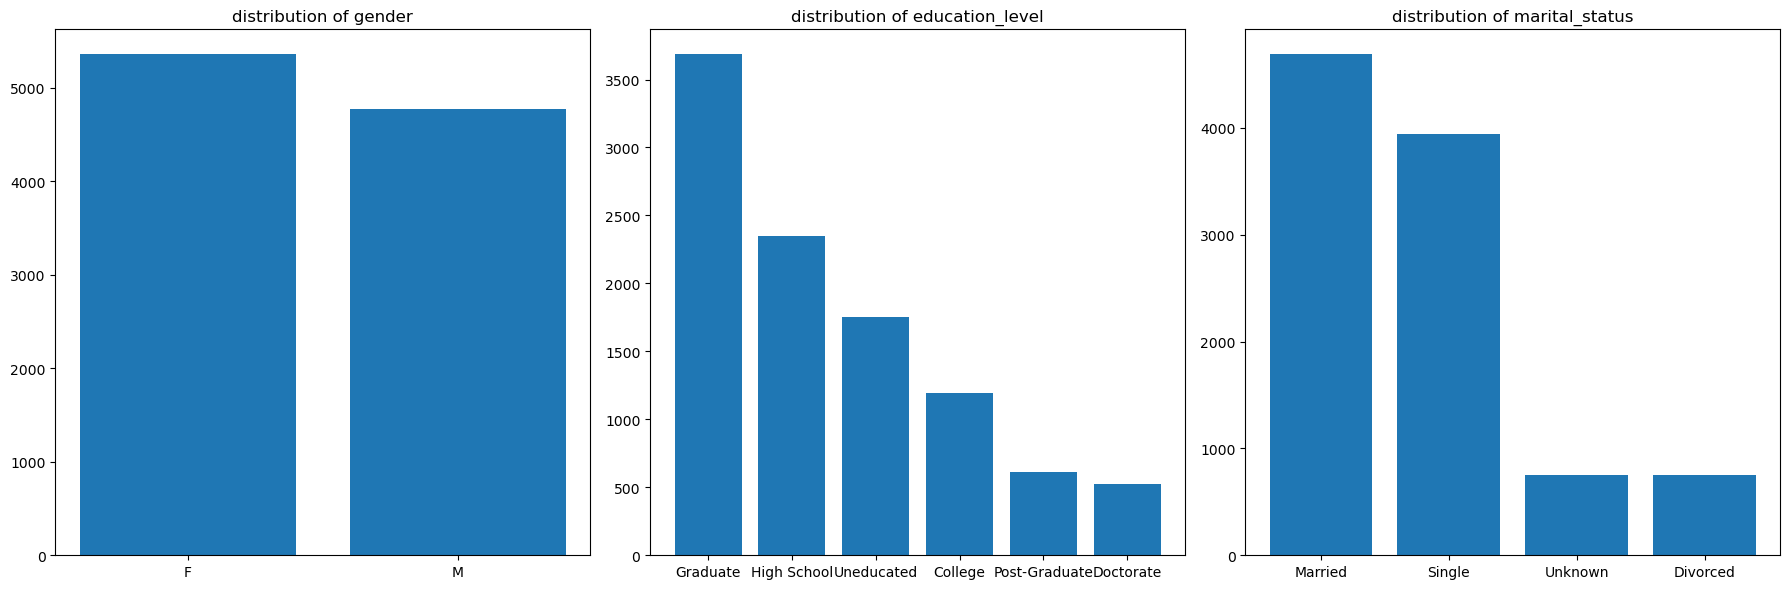

In [323]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(catCols):
    count = df[col].value_counts()
    ax[i].bar(count.index, count.values)
    ax[i].set_title(f"distribution of {col}")

plt.tight_layout()
plt.show()

## Initial Findings
Looking at the plots of different numerical features, I can see that some of them are normally distributed (Age, Months on Book, Dependent Count) but most of them seem to be skewed in one direction.

For the categorical features, there seems to be a fairly even split between Males and Females with a few more females, higher proportion of people who have completed their graduate degree more than any other education level, and about an even split between married and single people with a small percentage of divorced or unknown.

## Feature Engineering
Next, I will need to reformat the categorical columns to some numerical values so that they can be used for machine learning.

After that, I will be using StandardScaler to scale all the data, so that the range and variation in the different features is weighted equally

In [82]:
df_mod = df.copy()
df_mod['gender'] = df_mod['gender'].apply(lambda x: 1 if x=='M' else 0)

ed_levels = {
    'Uneducated':0,
    'High School':1,
    'College':2,
    'Graduate':3,
    'Post-Graduate':4,
    'Doctorate':5}
df_mod['education_level'] = df_mod['education_level'].apply(lambda x: ed_levels[x])

In [83]:
df_mod = pd.get_dummies(df_mod, columns=['marital_status'])

In [84]:
df_mod

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,False,True,False,False
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,False,False,True,False
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,False,True,False,False
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,False,False,False,True
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,1,2,3,51000,40,3,2,4003.0,15476,117,0.462,False,False,True,False
10123,710638233,41,1,2,3,40000,25,4,2,4277.0,8764,69,0.511,True,False,False,False
10124,716506083,44,0,1,1,33000,36,5,3,5409.0,10291,60,0.000,False,True,False,False
10125,717406983,30,1,2,3,47000,36,4,3,5281.0,8395,62,0.000,False,False,False,True


In [85]:
df_scaled = df_mod.drop('customer_id',axis=1)

scaler = StandardScaler()
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled)

df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,-0.282405,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.282405,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,-0.282405,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.282405,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,-0.282405,1.077338,-0.798507,-0.282609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,1.059956,-0.266547,0.662787,-0.281380,0.509840,-0.522785,-0.337598,-0.509330,3.259358,2.221481,0.678714,-0.282405,-0.928214,1.252337,-0.282609
10123,-0.664382,1.059956,-0.266547,0.662787,-0.560775,-1.368442,0.120579,-0.337598,-0.479181,1.283475,0.176440,0.856458,3.541013,-0.928214,-0.798507,-0.282609
10124,-0.290150,-0.943436,-1.036462,-0.752211,-0.738571,0.008965,0.763943,0.651940,-0.354626,1.732994,-0.207005,-0.997155,-0.282405,1.077338,-0.798507,-0.282609
10125,-2.036565,1.059956,-0.266547,0.662787,-0.382978,0.008965,0.120579,0.651940,-0.368710,1.174848,-0.121795,-0.997155,-0.282405,-0.928214,-0.798507,3.538459


## Finding the Optimal Amount of Clusters
For the K Means algorithm, I'll need to feed my model a cluster number **(K)** for it to use. There are several ways to identify what that optimal cluster number will be.

I will start by plotting the inertias of different K values (from 1 to 10 for now) on an "elbow curve" to see if I can find a K value that stands out as the moment where the rate of lowering inertia starts to decrease as I add more clusters

In [120]:
inertias = []

for k in range(1,11):
    model = KMeans(n_clusters=k)
    clusters = model.fit_predict(df_scaled)
    inertias.append(model.inertia_)

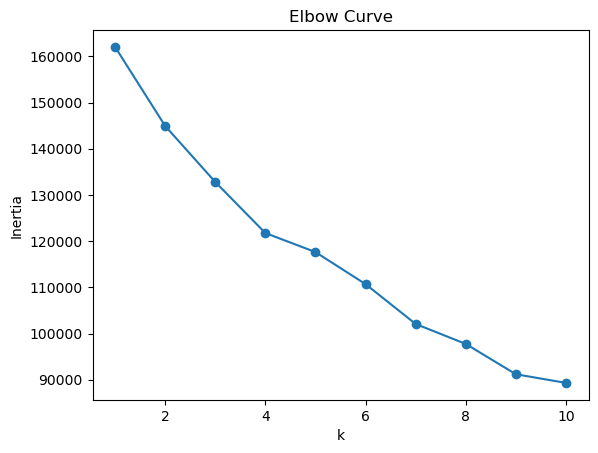

In [134]:
plt.plot(list(range(1,11)), inertias, marker = 'o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

The elbow curve above unfortunately hasn't yielded a clear "elbow." K=4 looked viable, but it seems it's just a kink in the graph rather than a true elbow.

Instead, I'll now use silhouette scores of different K values to see if one stands out as a clear winner

In [128]:
from sklearn.metrics import silhouette_score

silhouettes = []

for k in range(2,11):
    model = KMeans(n_clusters=k)

    df_array = df_scaled.values
    clusters = model.fit_predict(df_array)
    silScore = silhouette_score(df_array, clusters)
    silhouettes.append(silScore)

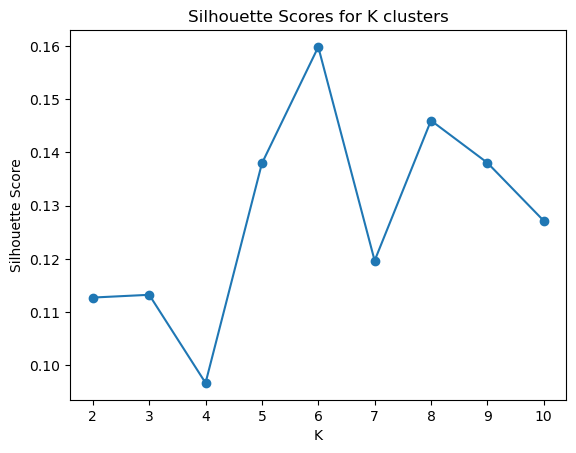

In [136]:
plt.plot(list(range(2,11)), silhouettes, marker = 'o')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K clusters')
plt.show()

It is clear here that at K=6 clusters, the silhouette score is maximized for my K range that I was testing. I will use K=6 for my KMeans model.

In [371]:
model = KMeans(n_clusters=6)
clusters = model.fit_predict(df_scaled)

After creating the clusters, I'll now take an initial look at the distribution of the clusters across the different features in the data.

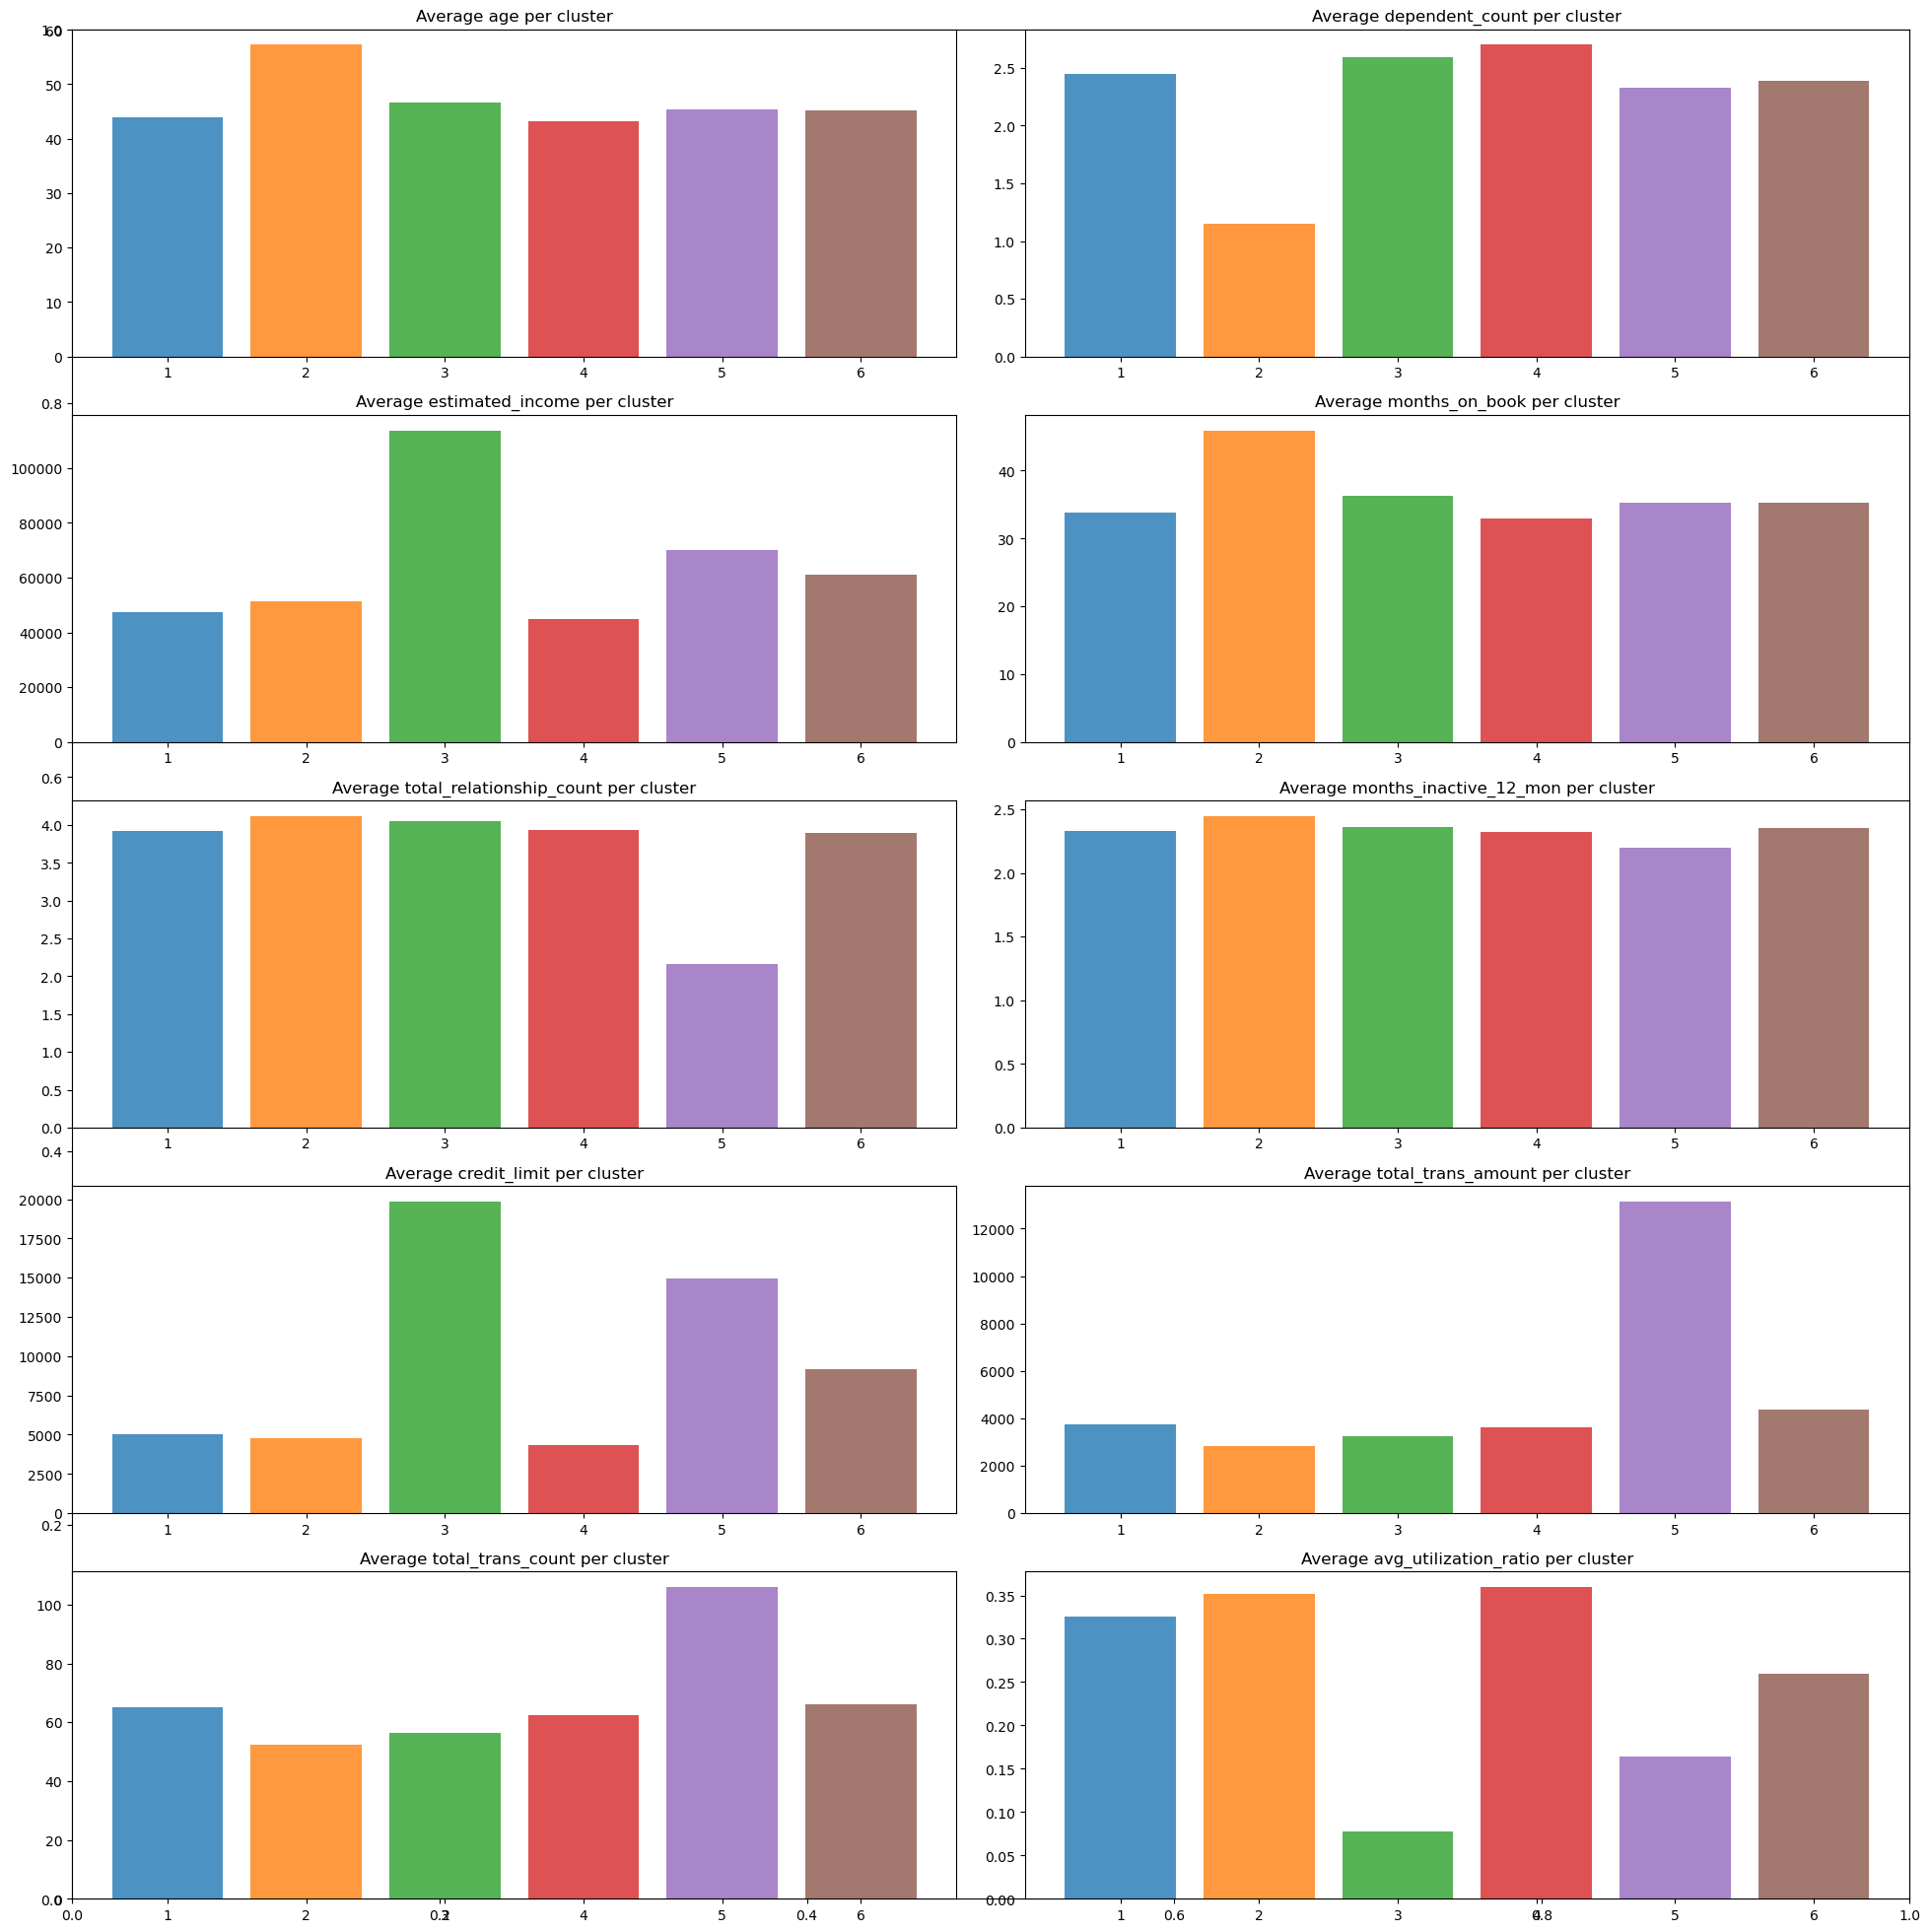

In [373]:
clusters+=1
df['CLUSTER'] = clusters

fig, ax = plt.subplots(figsize=(20, 20))

for i, col in enumerate(numCols):
    c_means = df.groupby('CLUSTER')[col].mean()

    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(c_means.index, c_means, color=sns.color_palette('tab10'), alpha=0.8)
    ax.set_title(f"Average {col} per cluster")

plt.tight_layout()
plt.show()

## Initial Cluster Findings
- Some of the features seem to show a fairly uniform distribution. The features here are: Age, Months on Book, Months Inactive
- Cluster 3 has the highest average income, which would make sense why they have the highest credit limit on average (and probably why they also have the lowest credit utilization)
- Cluster 5 has a significantly higher average total transaction amount (value) than any other cluster
- Cluster 1 and 2 have very similar values for almost all the features

While the distribution plots showed us some information about the clusters, there's still a lot deeper to go. 
I'm going to take a look at which of these features have strong correlations with each other to see if there's anything else I can learn about these clusters.

<Axes: >

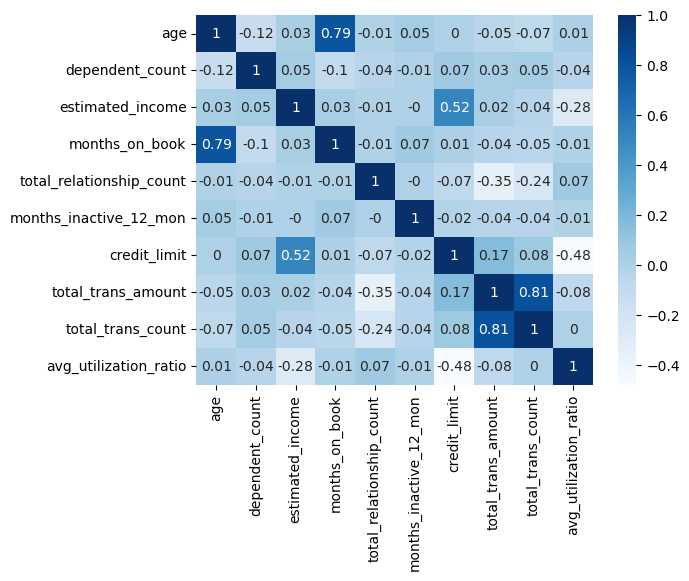

In [390]:
corrMap = df[numCols].corr()
sns.heatmap(round(corrMap,2), annot=True, cmap = 'Blues')

The feature pairs with the strongest (magnitude) correlations are the following:
- Total transaction count, Total transaction amount
- Age, Months on Book
- Estimated Income, Credit Limit
- Credit Limit, Avg Utilization Ratio

In [379]:
focusPairs = [
    ['age', 'months_on_book'],
    ['estimated_income', 'credit_limit'],
    ['total_trans_count', 'total_trans_amount'],
    ['credit_limit', 'avg_utilization_ratio']
]

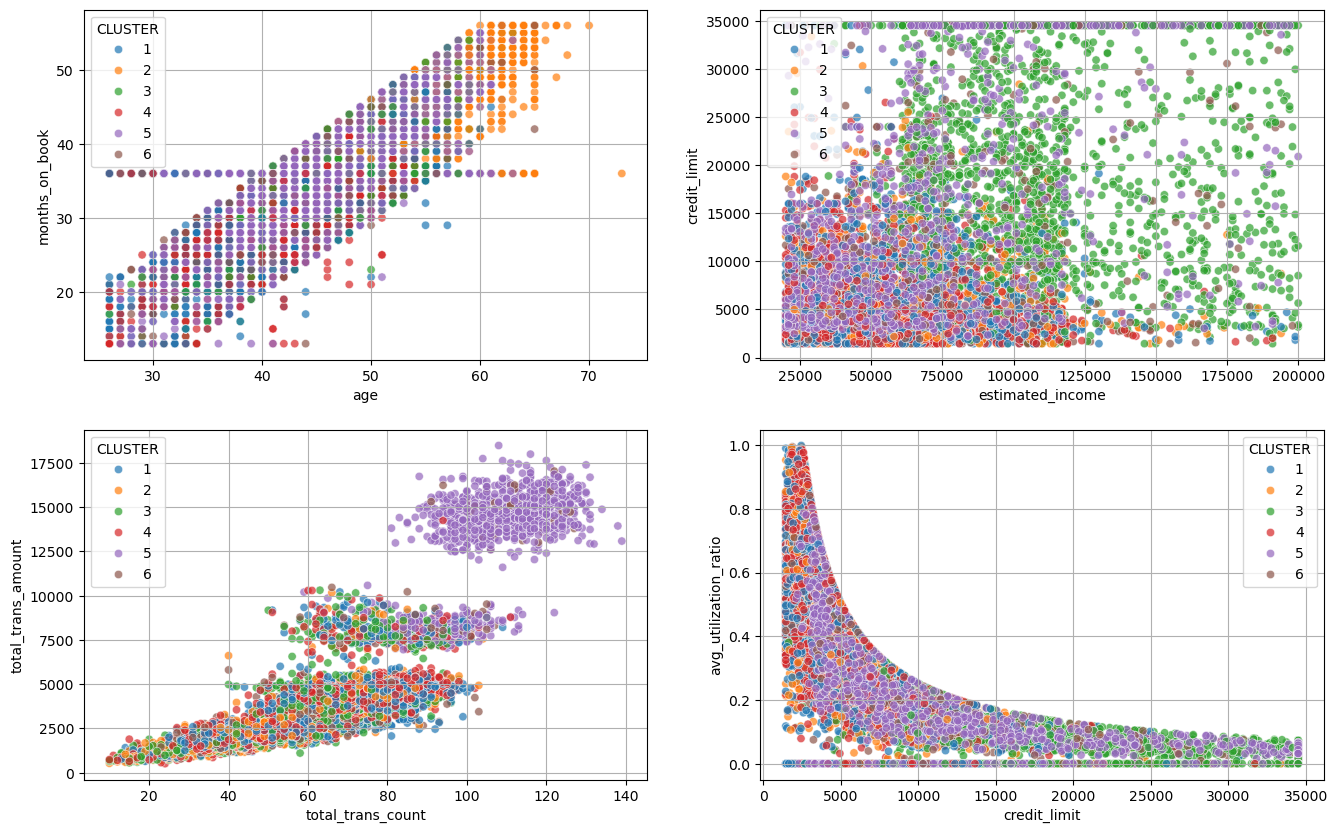

In [380]:
fig, ax = plt.subplots(2,2,figsize=(16,10))
i, j = 0, 0
for pair in focusPairs:
    sns.scatterplot(data=df, x=pair[0], y=pair[1], hue='CLUSTER', palette='tab10', alpha=0.7, ax=ax[i][j])
    ax[i][j].grid(True)
    
    j+=1
    if j>1:
        j=0
        i+=1

plt.tight_layout
plt.show()

## More Cluster Findings
After plotting the strong correlation pairs grouped by cluster, here are some things I noticed.
- There is clearly a linear relationship between customers' ages and how long a customer is on the books. It suggests that once a customer opens an account they will probably keep it open for the rest of their life.
- Although I had previously pointed out a fairly uniform distribution in the **mean** age of each cluster, it is clear that the oldest customers are mostly in cluster 2
- Cluster 5 seems to be spending the most on their cards and also using their card the most often. You can clearly see a "cluster" of Cluster 5 in the top right area of the Transaction Amount vs. Transaction Count graph.
- Cluster 3 seems to have many customers that have a relatively large income, but they really vary in their credit limits.

Finally, I am going to plot the distributions of the categorical columns for each cluster and see if there are any insights that I can pull from that.

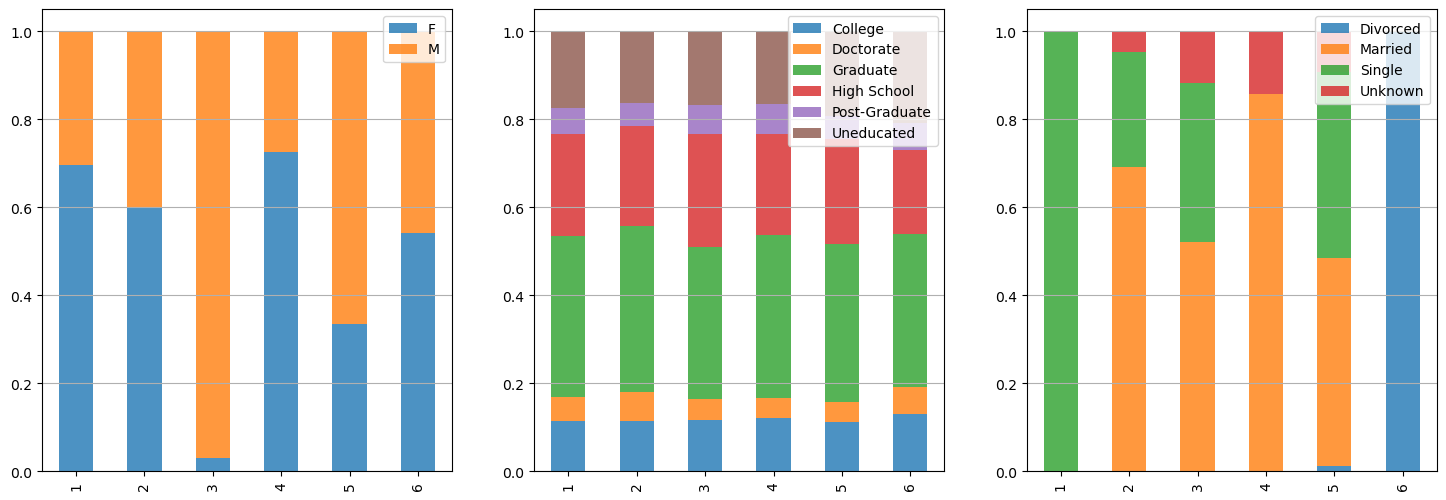

In [383]:
fig = plt.figure(figsize=(18,6))

for i, col in enumerate(catCols):
    plot_df = pd.crosstab(
        index=df['CLUSTER'], columns=df[col],
      values=df[col], aggfunc='size', normalize='index'
    )
    plot_df.columns.name = None
    plot_df.index.name = None
    plot_df.reset_index(drop=False)
    
    ax = fig.add_subplot(1, 3, i+1)
    
    plot_df.plot(kind='bar', stacked=True, ax=ax, alpha=0.8)
    ax.yaxis.grid()
    ax.legend(loc='upper right')

## Categorical Cluster Findings
There are definitely a lot of interesting learnings from these distributions.
- Most of the clusters skew towards one gender, Cluster 5 is almost comprised entirely of men
- The education levels seem to be distributed proportionally across all the clusters
- Clusters 1, 2, and 4 are comprised (almost) entirely of Single, Married, and Divorced customers, respectively

## Conclusion
I will be laying out some characteristics about each cluster. These could be used by the credit card company to strategically target certain clusters or make certain product/business decisions based on their needs.

### Cluster 1:
**Characteristics:** Majority low income females and is entirely comprised of single individuals with multiple dependents on average, high credit usage

**Insight:** Low-income single parents/caretakers are using a significant amount of their credit limit

### Cluster 2:
**Characteristics:** Majority low income females, high credit usage. Older customers

**Insight:** Low-income females are using a significant amount of their credit limit

### Cluster 3:
**Characteristics:** Almost entirely male customers with high income and high credit limit, even split between married and single, likely parents based on mean age and dependent count, low spending rate

**Insight:** Fathers seem to have the most money to spend, but seem to not spend a lot on their card. They could probably be incentivized to spend more

### Cluster 4:
**Characteristics:** Skews towards married females, and likely parents based on mean age and dependent count. Lower income, but high credit usage.

**Insights:** Low credit limits, but still have high card usage. Could be using it to make family purchases.

### Cluster 5:
**Characteristics:** Mostly male, but even split between single and married. High credit limits and very high spending amount (but within reasonable credit usage). Probably parents based on age and dependent count

**Insights:** These customers use their card frequently and spend the most out of any customer group

### Cluster 6:
**Characteristics:** Comprised entirely of divorced customers, even split between men and women with mid-level income and fair credit usage, but low total spend

**Insights:** These customers could benefit from increased credit limits to incentivize more spending, as they seem to be diligent with their credit usage

In [396]:
# LIST OF CUSTOMERS AND THEIR CLUSTERS
df[['customer_id', 'CLUSTER']]

,customer_id,CLUSTER
0,768805383,3
1,818770008,1
2,713982108,3
3,769911858,4
4,709106358,4
...,...,...
10122,772366833,5
10123,710638233,6
10124,716506083,4
10125,717406983,4
